### Your name:

<pre> Derek Pyne </pre>

### Collaborators:

<pre> None </pre>


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

# to make this notebook's output stable across runs
np.random.seed(123)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12


### Dimesionality Reduction

Q. What is the curse of dimensionality?

`The curse of dimensionality is the problem that as dimensions are added to a dataset the dataset becomes very sparse with almost all data close to a boundary in at least one dimension. This is because the parameter space grows as the power of the number of dimensions.`

Q. Can PCA be used to reduce the dimensionality of a highly nonlinear dataset?

`No. PCA is a linear transformation that rotates our axis to account for as much variance as possible in the first, second ect. axis. It does not do anything to transform a nonlinear dataset into a less nonlinear form.`

Q. How can you evaluate the performance of a dimensionality reduction algorithm on your dataset?

`For some dimensionality reduction algorithms, there are internal measures to grade the performance of the algorithm given a reduction target. For instance, in the case of PCA we can use the explained variance ratio to produce the fraction of signal preserved in the reduced dimensionality space. However, even better then this is to measure the success of the algorithm based on the end accuracy of the classification/regression pipeline. This gives us the final effect that the dimensionality reducation actually has on the final goal.`

Q. Load the MNIST dataset (introduced in Chapter 3) and split it into a training set and a test set (take the first 60,000 instances for training, and the remaining 10,000 for testing). Train a Random Forest classifier on the dataset and time how long it takes, then evaluate the resulting model on the test set. Next, use PCA to reduce the dataset’s dimensionality, with an explained variance ratio of 95%. Train a new Random Forest classifier on the reduced dataset and see how long it takes. Was training much faster? Next evaluate the classifier on the test set: how does it compare to the previous classifier?

In [3]:
from sklearn.datasets import fetch_mldata
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA

mnist = fetch_mldata('MNIST original')
X, y = mnist["data"], mnist["target"]

X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

We can now fit and test a random forest classifier with no hyperparameter tuning.

In [4]:
rf_clf = RandomForestClassifier(verbose=1)

rf_clf.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    5.2s finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=1,
            warm_start=False)

In [5]:
y_test_pred = rf_clf.predict(X_test)

print('Accuracy: %s' % accuracy_score(y_test, y_test_pred))

Accuracy: 0.9492


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


Now that the benchmark is set, let's use PCA to reduce the dimensionality while keeping 95% variance.

In [6]:
pca = PCA(n_components = .95)
X_train_pca = pca.fit_transform(X_train)

In [7]:
print('Original dimensions: %s' % X_train.shape[1])
print('PCA dimensions (95%% variance): %s' % X_train_pca.shape[1])

Original dimensions: 784
PCA dimensions (95% variance): 154


In [8]:
rf_pca_clf = RandomForestClassifier(verbose=1)

rf_pca_clf.fit(X_train_pca, y_train)

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   11.2s finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=1,
            warm_start=False)

In [9]:
y_test_pred_pca = rf_pca_clf.predict(pca.transform(X_test))

print('Accuracy: %s' % accuracy_score(y_test, y_test_pred_pca))

Accuracy: 0.8948


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


Strangely, training our classifier on the reduced dataset actually led to a training time increase from 4.9s to 11.0s and a decrease in accuracy of ~5%. The decline in accuracy makes sense as we reduced the dimensionality which inevetable lost some signal. However, the longer training time was not expected and would need investigation into the details of random forest training to properly explain. One theory is that with the reduction in signal the training required extra iterations/trees to converge. Regardless, this shows that dimensionality reduction isn't a straight forward step.

Q. Use t-SNE to reduce the MNIST dataset down to two dimensions and plot the result using Matplotlib. You can use a scatterplot using 10 different colors to represent each image’s target class. Alternatively, you can write colored digits at the location of each instance, or even plot scaled-down versions of the digit images themselves (if you plot all digits, the visualization will be too cluttered, so you should either draw a random sample or plot an instance only if no other instance has already been plotted at a close distance). You should get a nice visualization with well-separated clusters of digits. Try using other dimensionality reduction algorithms such as PCA, LLE, or MDS and compare the resulting visualizations.

Since the goal is to plot the data and some of these algorithms take very long to train, we will use a random subset of our original dataset.

In [10]:
from sklearn.model_selection import train_test_split

X_sample, _, y_sample, _ = train_test_split(X, y, test_size=0.95, random_state=42)

In [11]:
from MulticoreTSNE import MulticoreTSNE

tsne = MulticoreTSNE(n_jobs=-1)
X_tsne = tsne.fit_transform(X_sample)

In [12]:
def dimensionality_reduction_plot(X, y, title):
    df = pd.DataFrame({'X_1': X[:,0], 'X_2': X[:,1], 'y': y})
    sns.lmplot('X_1', 'X_2', data=df, hue='y', fit_reg=False, scatter_kws={"s": 2})
    plt.title(title)

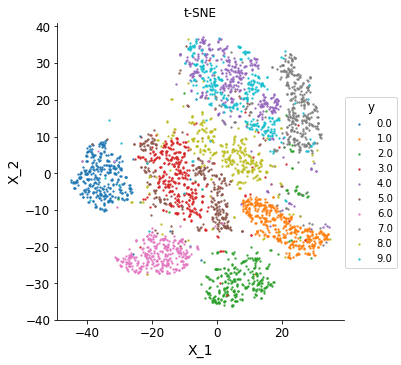

In [13]:
dimensionality_reduction_plot(X_tsne, y_sample, 't-SNE')

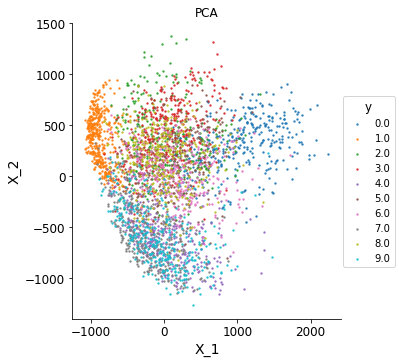

In [14]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_sample)
dimensionality_reduction_plot(X_pca, y_sample, title='PCA')

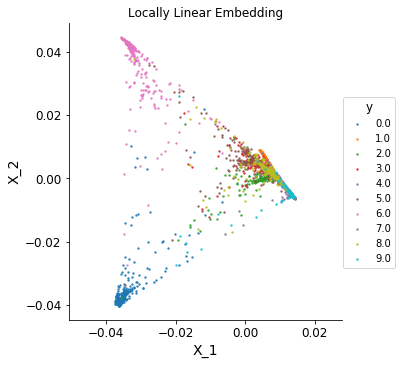

In [15]:
from sklearn.manifold import LocallyLinearEmbedding
lle = LocallyLinearEmbedding(n_components=2, n_jobs=-1)
X_lle = lle.fit_transform(X_sample)
dimensionality_reduction_plot(X_lle, y_sample, title='Locally Linear Embedding')

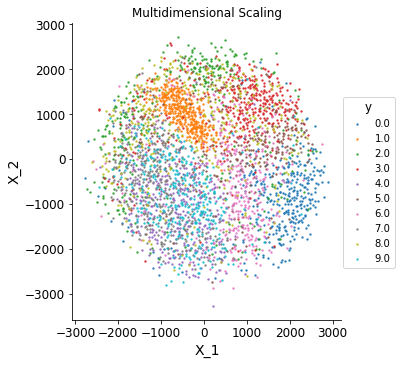

In [16]:
from sklearn.manifold import MDS
mds = MDS(n_components=2, n_jobs=-1)
X_mds = mds.fit_transform(X_sample)
dimensionality_reduction_plot(X_mds, y_sample, title='Multidimensional Scaling')

[Optional] Read
https://marckhoury.github.io/counterintuitive-properties-of-high-dimensional-space/

Summary your most interesting finding

The big takeaways for me from this article is just how truley bad our brains are at providing an intuition in higher dimensional spaces. Now, to be fair, this is also quite reasonable since we operate in a three-dimensional space and have evolved to quickly judge and analyze it. The notion of the sparsity in higher dimensions is clear, but something that still doesn't make sense to me is the volume of a unit d-sphere. The fact that the volumn increases, hits a maximum at 3 dimensions, and then continually decreases to 0 is puzzling. How any function that describes these dimensions could not be monotomically increasing or decreasing is quite strange.

### Submit your notebook

Submit your solution here
https://goo.gl/forms/VKD7Zwu54oHjutDc2
Make sure you rename your notebook to    
W3_UTORid.ipynb    
Example W3_adfasd01.ipynb
